# Aim of the notebook

This notebook will analyse the Caltech256 dataset. This analysis will later be used for the capstone project.

## Data
The dataset is aviable at http://www.vision.caltech.edu/Image_Datasets/Caltech256/. It contains 30607 images in 256 categories.

##  Questions
- How do the images look.
- How many training examples are aviable for each class?
- Size of the images.
- Distribution of RGB - Values in the different classes

In [2]:
# import libraries
import matplotlib.pyplot as plt
from IPython.display import Image
from collections import Counter
from sklearn.svm import SVC
import PIL as pil
import os as os
import numpy as np
import pandas as pd
import cv2
import seaborn as sns

%matplotlib inline

### How do the images look.
The following images show some randomly choosen images of the dataset, in different categories.

<b>AK 47

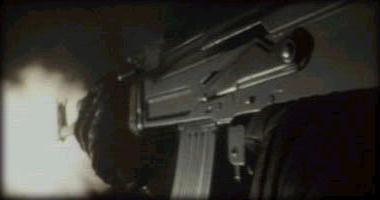

In [6]:
Image(data='../capstone-project/data/001.ak47/001_0005.jpg')

<b> Brain

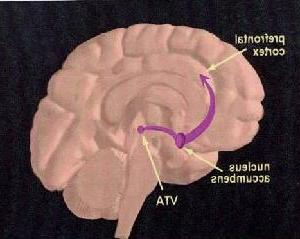

In [8]:
Image(data='../capstone-project/data/020.brain-101/020_0064.jpg')

<b>Breadmaker

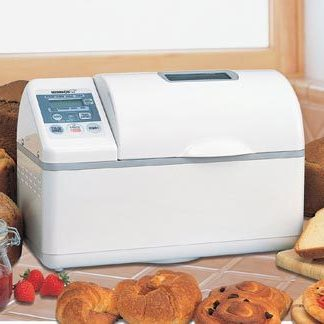

In [9]:
Image(data='../capstone-project/data/021.breadmaker/021_0030.jpg')

<b> IPod

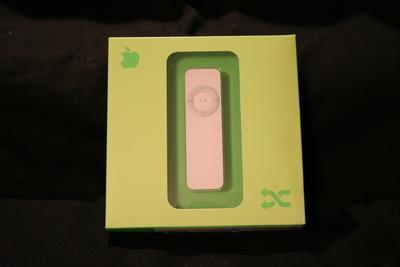

In [11]:
Image(data='../capstone-project/data/117.ipod/117_0029.jpg')

<b> Leopard

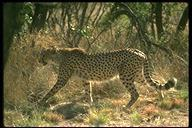

In [12]:
Image(data='../capstone-project/data/129.leopards-101/129_0012.jpg')

The objects in the different categories are mostly centered in the image.

### How many training examples are aviable for each class?

In [13]:
# returns the amount of files with a specific extension
def count_files(path, extension='.jpg'):
    count = 0
    for file in os.listdir(path):
        if file.endswith(extension):
            count += 1
    return count

In [20]:
# returns a pandas Dataframe with two columns, containg folder name and the amount of files for that folder
def files_per_folder(path, extension='.jpg'):
    df = pd.DataFrame(columns=['folder', 'count'])
    for file in os.listdir(path):
        child = os.path.join(path, file)
        if os.path.isdir(child):
            count = count_files(child, extension)
            df = df.append({
                'folder': file,
                'count': count
            }, ignore_index=True)
    return df

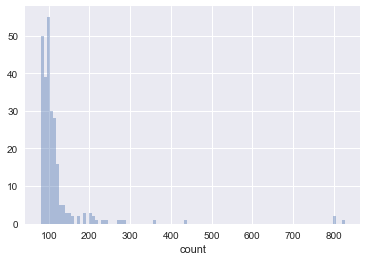

In [22]:
classes = files_per_folder('../capstone-project/data/')
sns.distplot(classes['count'], 100, kde=False)

The histogram we can see the distribution of the different categories. Some categories contain more than 800 images.

In [19]:
sample_count = classes['count']
print('Mean: ', round(sample_count.mean()))
print('Min: ', sample_count.min())
print('Max: ', sample_count.max())

Mean:  119.0
Min:  80.0
Max:  827.0


The average amount of categories is about 119, but there are some categories which contain much more samples.

### Size of the images

In [17]:
# lists the occurences of image resolutions in a directory
def image_resolution_occurance(path):
    sizes = {}
    for file in os.listdir(path):
        if file.endswith('jpg'):
            child = os.path.join(path, file)
            im = pil.Image.open(child)
            try:
                sizes[im.size] += 1
            except:
                sizes[im.size] = 1
    return sizes

In [18]:
# count the occurances of each resolution in a path
def image_resolution_occurance_multi(path):
    occ = Counter({})
    for file in os.listdir(path):
        child = os.path.join(path, file)
        if os.path.isdir(child):
            sizes = image_resolution_occurance(child)
            occ += Counter(sizes)
    return occ

In [23]:
occurrances = image_resolution_occurance_multi('../capstone-project/data/')
occurrances = pd.DataFrame.from_dict(occurrances, orient='index').reset_index()
occurrances.columns = ["res", "occ"]
occurrances.head()

,res,occ
0,"(180, 313)",1
1,"(399, 217)",1
2,"(280, 261)",2
3,"(350, 617)",1
4,"(261, 216)",1


In [24]:
len(occurrances)

15423

We see that we have 15423 different image resoultions. We try to find an average resoultion we can scale our other images to.

In [25]:
# split width and height - tuple in seperate columns
occurrances[['width', 'height']] = occurrances['res'].apply(pd.Series)
occurrances.head()

,res,occ,width,height
0,"(180, 313)",1,180,313
1,"(399, 217)",1,399,217
2,"(280, 261)",2,280,261
3,"(350, 617)",1,350,617
4,"(261, 216)",1,261,216


In [28]:
# mean width
mean_width = round(occurrances["width"].mean())

# mean height
mean_height = round(occurrances["height"].mean())

In [31]:
print('Mean width: ', mean_width)
print('Mean height: ', mean_height)

Mean width:  382.0
Mean height:  345.0


Above are the mean width and height for each image. I rescaled the images to this size that they are compareable.

Underneath are two pictures one is in original size the other one is the rescaled version:

<b> Original

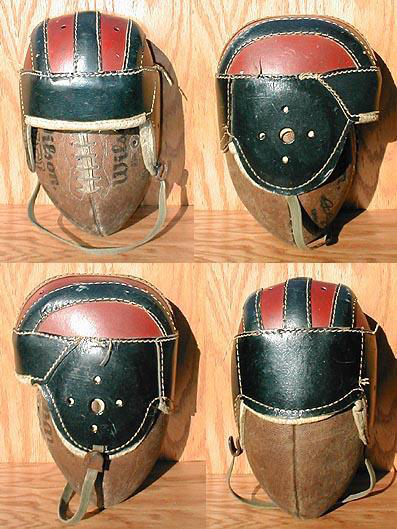

In [38]:
pil.Image.open('../capstone-project/data/076.football-helmet/076_0016.jpg')

<b> Rescaled

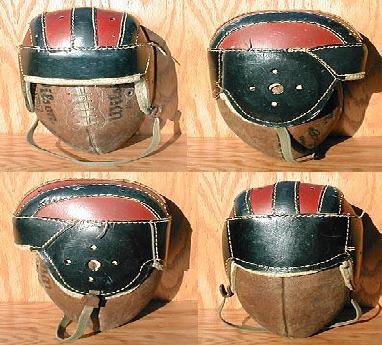

In [39]:
pil.Image.open('../capstone-project/data_resized/076.football-helmet/076_0016.jpg')

### RGB - Values of different classes.

In [3]:
# get rgb values of a single image
def get_rgb_values_of_image(image):
    r_values = []
    g_values = []
    b_values = []
    image_rgb_values = np.array(image)
    rows, columns, rgb_value = image_rgb_values.shape
    
    for row in range(0, rows):
        for column in range(0, columns):
                r_values.append(image_rgb_values[row, column][0])
                g_values.append(image_rgb_values[row, column][1])
                b_values.append(image_rgb_values[row, column][2])
    return r_values, g_values, b_values

In [4]:
# get rgb values for a class, the image_count is how many will be taken 
def get_rgb_values_for_class(path, image_count=80):
    r_values = []
    g_values = []
    b_values = []
    counter = 0
    
    for file in os.listdir(path):
        if (counter == image_count):
            break
        if file.endswith('jpg'):
            image_path = os.path.join(path, file)
            image = pil.Image.open(image_path)
            try:
                r, g, b = get_rgb_values_of_image(image)
                r_values = r_values + r
                g_values = g_values + g
                b_values = b_values + b
            except:
                continue
            counter += 1
    return r_values, g_values, b_values

/home/florian/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


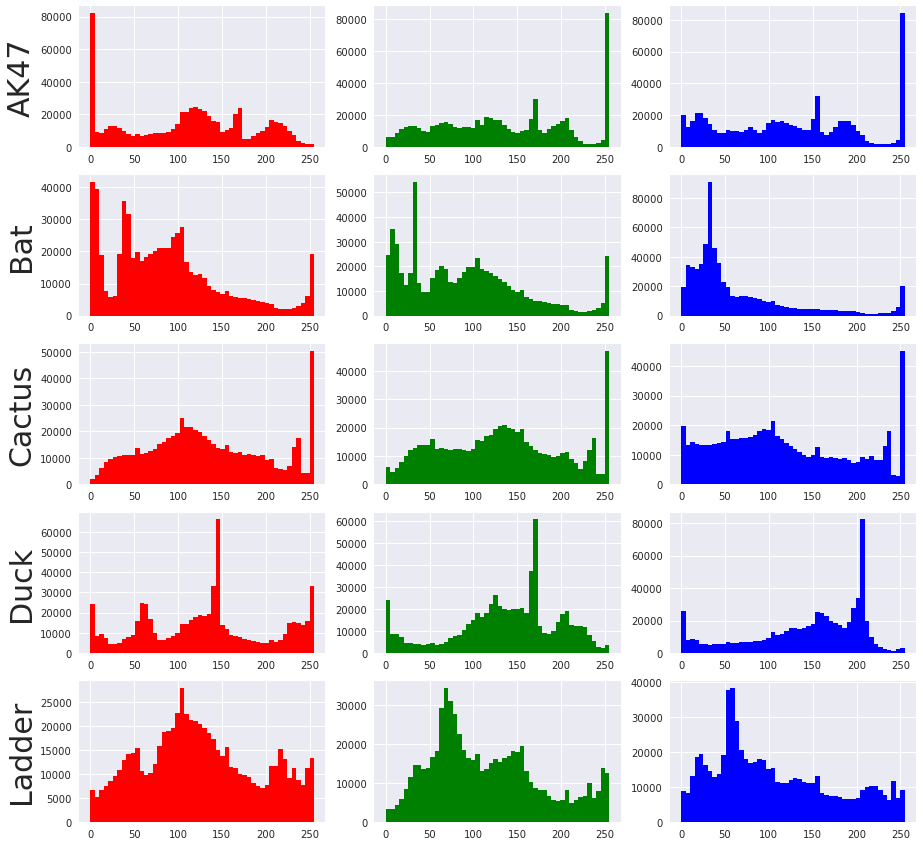

In [8]:
img_count = 5

fig = plt.figure()
fig.set_size_inches(15, 15)
ax1 = fig.add_subplot(531)
ax2 = fig.add_subplot(532)
ax3 = fig.add_subplot(533)
ax4 = fig.add_subplot(534)
ax5 = fig.add_subplot(535)
ax6 = fig.add_subplot(536)
ax7 = fig.add_subplot(537)
ax8 = fig.add_subplot(538)
ax9 = fig.add_subplot(539)
ax10 = fig.add_subplot(5, 3, 10)
ax11 = fig.add_subplot(5, 3, 11)
ax12 = fig.add_subplot(5, 3, 12)
ax13 = fig.add_subplot(5, 3, 13)
ax14 = fig.add_subplot(5, 3, 14)
ax15 = fig.add_subplot(5, 3, 15)

ax1.set_ylabel('AK47', fontsize='30')
ax4.set_ylabel('Bat', fontsize='30')
ax7.set_ylabel('Cactus', fontsize='30')
ax10.set_ylabel('Duck', fontsize='30')
ax13.set_ylabel('Ladder', fontsize='30')

r, g, b = get_rgb_values_for_class('../capstone-project/data/data_resized/001.ak47/', img_count)
ax1.hist(r, color='red', bins=50)
ax2.hist(g, color='green', bins=50)
ax3.hist(b, color='blue', bins=50)

r, g, b = get_rgb_values_for_class('../capstone-project/data/data_resized/007.bat/', img_count)
ax4.hist(r, color='red', bins=50)
ax5.hist(g, color='green', bins=50)
ax6.hist(b, color='blue', bins=50)

r, g, b = get_rgb_values_for_class('../capstone-project/data/data_resized/025.cactus/', img_count)
ax7.hist(r, color='red', bins=50)
ax8.hist(g, color='green', bins=50)
ax9.hist(b, color='blue', bins=50)

r, g, b = get_rgb_values_for_class('../capstone-project/data/data_resized/060.duck/', img_count)
ax10.hist(r, color='red', bins=50)
ax11.hist(g, color='green', bins=50)
ax12.hist(b, color='blue', bins=50)

r, g, b = get_rgb_values_for_class('../capstone-project/data/data_resized/126.ladder/', img_count)
ax13.hist(r, color='red', bins=50)
ax14.hist(g, color='green', bins=50)
ax15.hist(b, color='blue', bins=50)

plt.show()

## Conclusion:
For clarity reasons I will answer the asked questions in a quick overview again the answers are also in the notebook.<br><br>
<b>Questions:</b>
- How do the images look?<br>
The objects in the different categories are mostly centered in the image. This important for image classification, if the images wouldent be centered we would need an other algorithm to detect where the objects are.


- How many training examples are aviable for each class?<br>
Min: 80<br>
Max: 827<br>
Mean 119<br>
The amount images in the different classes are not equally distributed, but we have at least 80 images per class. If we want to train a classifier we should consider to reduce the training images in the classes with a high amount of images, because if there is a so high imbalance it can have impact on the classifier.


- Size of the images?<br>
If we look at our analysis we see that there are 15423 different image resolutions that can often be a problem if we want to train a classifier on it, so we resized the images on the mean width and height. 


- Distribution of RGB - Values in the different classes<br>
Above are plots of the RGB - Values on 5 different classes. We can see that the distribution of the values differ in different classes. But if we want to classify different images only on the RGB - distributions we might run into a problem. The background of the image mostly has the biggest impact on the distribution of the RGB - values, and if we think about a goldfish and a bat the background alone will often differ much, so we should consider that if we want to train a classifier.